# Your first convolutional neural network

# imports

In [ ]:
import numpy as np
from random import randint
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

from torchsummary import summary

## Data

In [ ]:
NUM_CLASSES = 10

In [ ]:
batch_size = 32

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


# architecture

In [ ]:
class FirstCNN(nn.Module):
    def __init__(self): 
        super(FirstCNN, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 10, kernel_size=(4, 4), stride=2, padding=1),
            nn.Conv2d(10, 20, kernel_size=(3, 3), stride=2, padding=1),
            nn.Flatten(),
            nn.Linear(1280, 10)
        )
        
    def forward(self, x):
        x = self.model(x)
        return x

In [ ]:
net = FirstCNN().to("cuda").to('cuda')
print(net)

FirstCNN(
  (model): Sequential(
    (0): Conv2d(3, 10, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): Conv2d(10, 20, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (2): Flatten()
    (3): Linear(in_features=1280, out_features=10, bias=True)
  )
)


In [ ]:
summary(net, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 16, 16]             490
            Conv2d-2             [-1, 20, 8, 8]           1,820
           Flatten-3                 [-1, 1280]               0
            Linear-4                   [-1, 10]          12,810
Total params: 15,120
Trainable params: 15,120
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.04
Params size (MB): 0.06
Estimated Total Size (MB): 0.11
----------------------------------------------------------------


In [ ]:
class CNN(nn.Module):
    def __init__(self): 
        super(CNN, self).__init__()
        self.model = nn.Sequential(
            self.conv_block(in_channel=3, filters=32, kernel_size=3, stride=1, padding=1),
            self.conv_block(in_channel=32, filters=32, kernel_size=3, stride=2, padding=1),
            self.conv_block(in_channel=32, filters=64, kernel_size=3, stride=1, padding=1),
            self.conv_block(in_channel=64, filters=64, kernel_size=3, stride=2, padding=1),
            nn.Flatten(),
            nn.Linear(4096, 128),
            nn.BatchNorm1d(128),
            nn.LeakyReLU(),
            nn.Dropout(inplace=True),
            nn.Linear(128, 10),
            nn.Softmax()
        )
        
    def forward(self, x):
        x = self.model(x)
        return x

    def conv_block(self, in_channel, filters, kernel_size, stride, padding):
      return nn.Sequential(    
        nn.Conv2d(in_channel, filters, kernel_size, stride, padding),
        nn.BatchNorm2d(filters),
        nn.LeakyReLU(),
        )

In [ ]:
net = CNN().to("cuda").to('cuda')
print(net)

CNN(
  (model): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (1): Sequential(
      (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (2): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (3): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (4): Flatten()
    (5

In [ ]:
summary(net, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
       BatchNorm2d-2           [-1, 32, 32, 32]              64
         LeakyReLU-3           [-1, 32, 32, 32]               0
            Conv2d-4           [-1, 32, 16, 16]           9,248
       BatchNorm2d-5           [-1, 32, 16, 16]              64
         LeakyReLU-6           [-1, 32, 16, 16]               0
            Conv2d-7           [-1, 64, 16, 16]          18,496
       BatchNorm2d-8           [-1, 64, 16, 16]             128
         LeakyReLU-9           [-1, 64, 16, 16]               0
           Conv2d-10             [-1, 64, 8, 8]          36,928
      BatchNorm2d-11             [-1, 64, 8, 8]             128
        LeakyReLU-12             [-1, 64, 8, 8]               0
          Flatten-13                 [-1, 4096]               0
           Linear-14                  [

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:117: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


# train

In [ ]:
loss_fn = F.cross_entropy
opt = torch.optim.Adam(net.parameters(), lr = 0.0005)

In [ ]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to("cuda"), labels.to("cuda")
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:117: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Epoch: 0/10, Test acc: 59.67, Train acc: 61.48
Epoch: 1/10, Test acc: 64.50, Train acc: 67.82
Epoch: 2/10, Test acc: 67.43, Train acc: 70.61
Epoch: 3/10, Test acc: 69.42, Train acc: 73.17
Epoch: 4/10, Test acc: 70.24, Train acc: 75.10
Epoch: 5/10, Test acc: 70.39, Train acc: 76.30
Epoch: 6/10, Test acc: 71.06, Train acc: 77.42
Epoch: 7/10, Test acc: 71.76, Train acc: 78.70
Epoch: 8/10, Test acc: 71.91, Train acc: 79.69
Epoch: 9/10, Test acc: 71.89, Train acc: 79.94


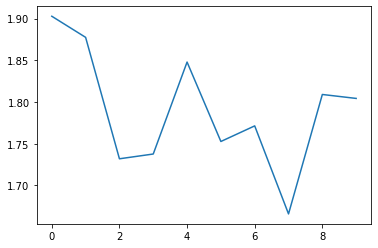

CPU times: user 3min 32s, sys: 1.7 s, total: 3min 34s
Wall time: 3min 35s


In [ ]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 10

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to("cuda"), labels.to("cuda")

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        loss_arr.append(loss.item())
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))
    
    
plt.plot(loss_epoch_arr)
plt.show()

# analysis

In [ ]:
print('Test acc: %0.2f, Train acc: %0.2f' % (evaluation(testloader), evaluation(trainloader)))

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:117: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Test acc: 72.14, Train acc: 79.86


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:117: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


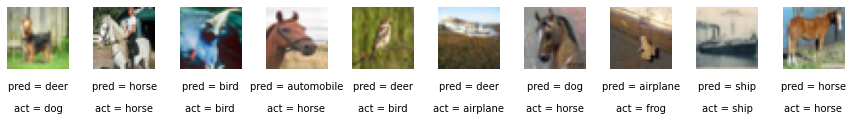

In [ ]:
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
n_to_show = 10
classes = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

for i, data in enumerate(testloader, 0):
  
  if i > 9:
    break
  
  inputs, labels = data
  inputs, labels = inputs.to("cuda"), labels.to("cuda")

  outputs = net(inputs)
  _, pred = torch.max(outputs.data, 1)

  ax = fig.add_subplot(1, n_to_show, i+1)
  ax.axis('off')
  idx = randint(0, 31)
  ax.text(0.5, -0.35, 'pred = ' + str(classes[pred[idx]]), fontsize=10, ha='center', transform=ax.transAxes) 
  ax.text(0.5, -0.7, 'act = ' + str(classes[labels[idx]]), fontsize=10, ha='center', transform=ax.transAxes)
  ax.imshow(inputs[idx].permute(1, 2, 0).cpu())